In [1]:
import pandas as pd

In [2]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

# Análise Preliminar

In [3]:
dfClientes.sample(5) #dados aleatórios. tem o .head() e .tail()

,id,nome,sexo,dt_nasc
608,609,Enzo Barros,M,3/2/1959
77,78,Leila Sousa,F,8/22/1988
868,869,Eduarda Costa,F,10/15/1937
426,427,Kauã Cunha,M,7/16/1968
471,472,Melissa Silva,F,2/27/1972


In [4]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [5]:
dfClientes[dfClientes.isnull().T.any()]  #T to transpor

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [7]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<Axes: >

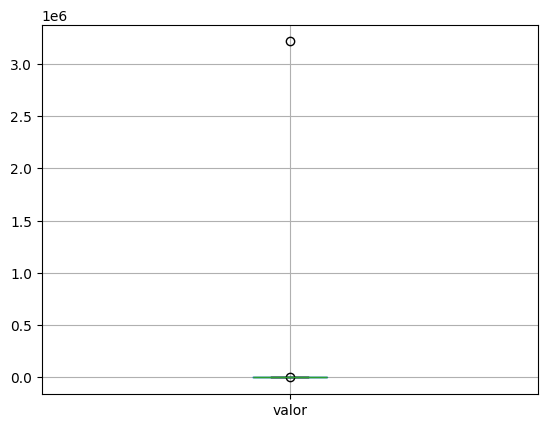

In [8]:
dfProdutos.boxplot(column='valor') #identificacao de outliers

In [9]:
dfProdutos[dfProdutos.valor > 300000]

,id,produto,valor
9,10,xxx-231a,3211352.0


In [10]:
dfProdutos[dfProdutos.valor < 300000].boxplot(column='valor')

<Axes: >

In [11]:
dfVendas[dfVendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [12]:
dfVendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [13]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


In [14]:
dfPagamentos.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN


# Data Cleaning

## Dados nulos

In [15]:
dfClientes.loc[1, 'nome'] #mais indicado quando quer fazer uma substituicao 

'Caio Pereira'

In [16]:
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = '0'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2023'

In [17]:
dfClientes.loc[[269,287],:]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2023
287,288,Victor Ribeiro,0,12/17/1974


In [18]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

## Outliers

In [19]:
dfProdutos.loc[9,'valor'] = dfProdutos.valor[9]/10000

In [20]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


In [21]:
dfProdutos.boxplot(column=['valor'])

<Axes: >

## Consistência

In [22]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)].count()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [23]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [24]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [25]:
dfPagamentos[~dfPagamentos.id_venda.isin(dfVendas.id)] # busca se existe alguma dfPagamentos.id_venda que não exista em dfVendas.id_vendas - "isso seria um pagamento sem venda"

,id,id_venda,dt_pgto


In [26]:
dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)].count() #vendas que nao geraram pagamento. 928 vendas sem pagamento

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Dados duplicados

In [27]:
dfClientes.nome.duplicated().sum()

109

In [28]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [29]:
dfClientes[dfClientes.nome=='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [30]:
dfClientes.drop('id',axis=1).duplicated().sum() #dados duplicados de um df

0

In [31]:
dfProdutos.produto.duplicated().sum() #se existe algum produto duplicado

0

In [32]:
dfLojas.cidade.duplicated().sum()

0

In [33]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [34]:
dfVendas[(dfVendas.id_cliente==559) & (dfVendas.id_loja==2) & (dfVendas.id_produto==5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [35]:
dfPagamentos.drop('id', axis=1).duplicated().sum()

0

## Formato de dados

In [36]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format = '%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [37]:
dfVendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [38]:
dfPagamentos

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


In [39]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


In [40]:
dfLojas

,id,cidade
0,1,São Paulo
1,2,Rio de Janeiro
2,3,Curitiba
3,4,Belo Horizonte
4,5,Santa Catarina
5,6,Recife
6,7,Salvador
7,8,Brasília
8,9,Palmas
9,10,Vitória


## Indexes

In [41]:
dfClientes = dfClientes.set_index('id')
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [42]:
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')

In [43]:
dfProdutos.index #chave primária e referencia de cada linha

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='id')

# Data Fusion

In [44]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dfLojas.add_prefix('lojas_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [45]:
dfClientes.loc[393]

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

In [46]:
df = df.join(dfPagamentos.set_index('id_venda'))
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [47]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
lojas_cidade         0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

# Feature Engineering

In [48]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [49]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [50]:
import numpy as np
df['cliente_idade'] = round(((pd.to_datetime('today') - df.cliente_dt_nasc).dt.days)/365)

In [51]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0


# Análises

## Lojas e Produtos que mais vendem

In [52]:
graf_dados = df.groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

lojas_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por lojas')

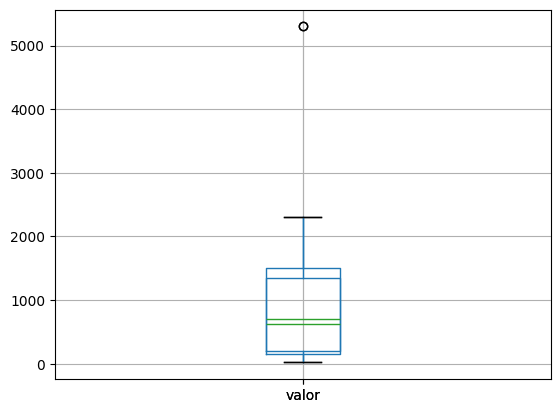

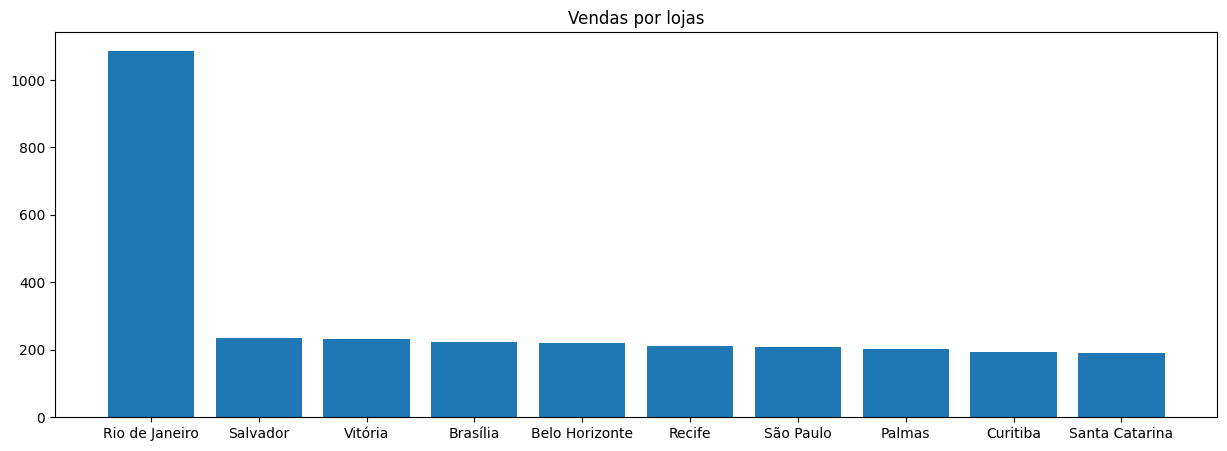

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por lojas')

## Produtos que mais vendem

In [54]:
graf_dados=df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Produtos mais vendidos')

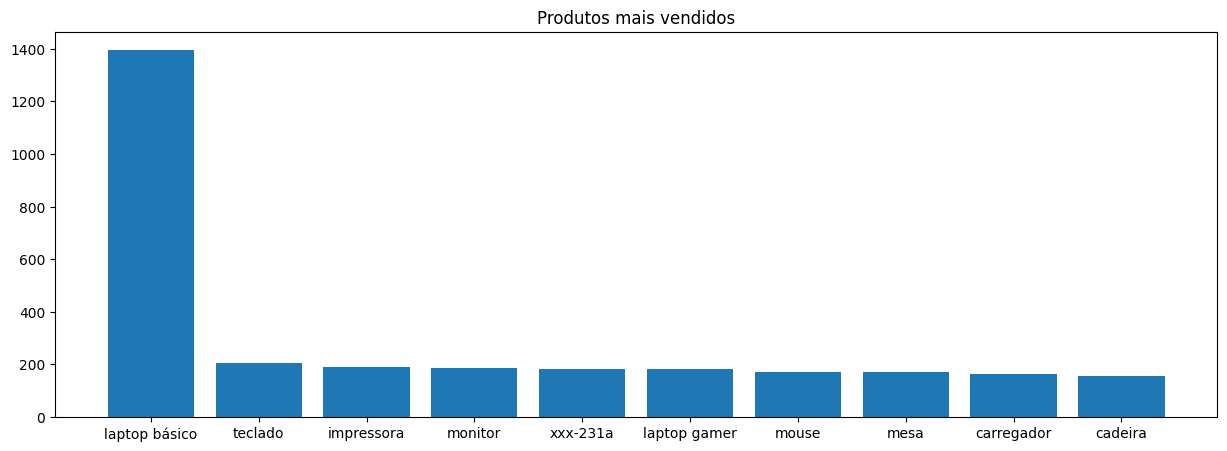

In [55]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Produtos mais vendidos')

## Receita por loja

In [56]:
graf_dados = df[['lojas_cidade','produto_valor']].groupby('lojas_cidade').sum().produto_valor.sort_values(ascending=False)

Text(0.5, 1.0, 'Receita por loja')

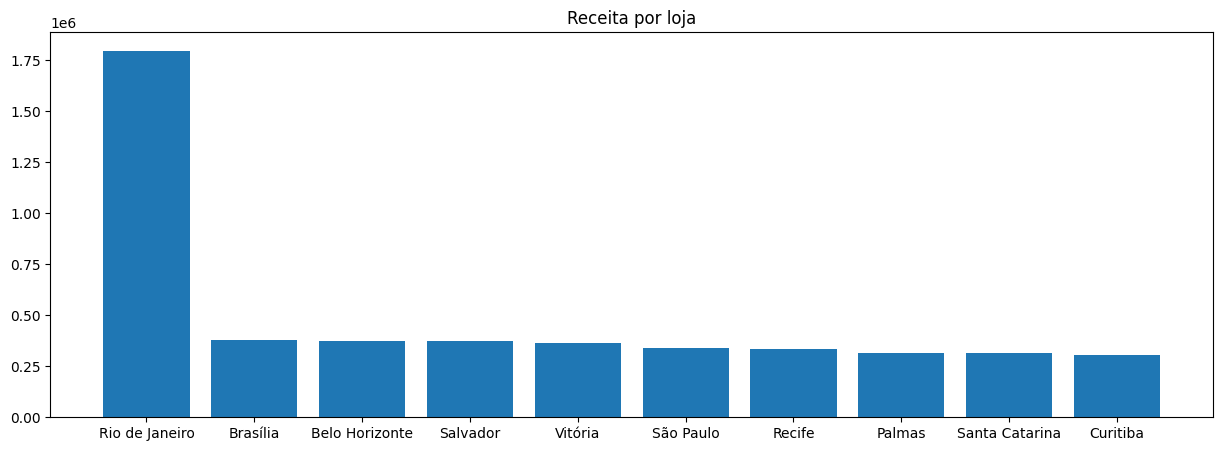

In [57]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por loja')

In [58]:
percentual = graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean()
media = graf_dados[graf_dados!=graf_dados.max()].mean()
maximo = graf_dados.max()
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (maximo,percentual,media))


O maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


## Receita por produto

In [59]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)

Text(0.5, 1.0, 'Receita por produto')

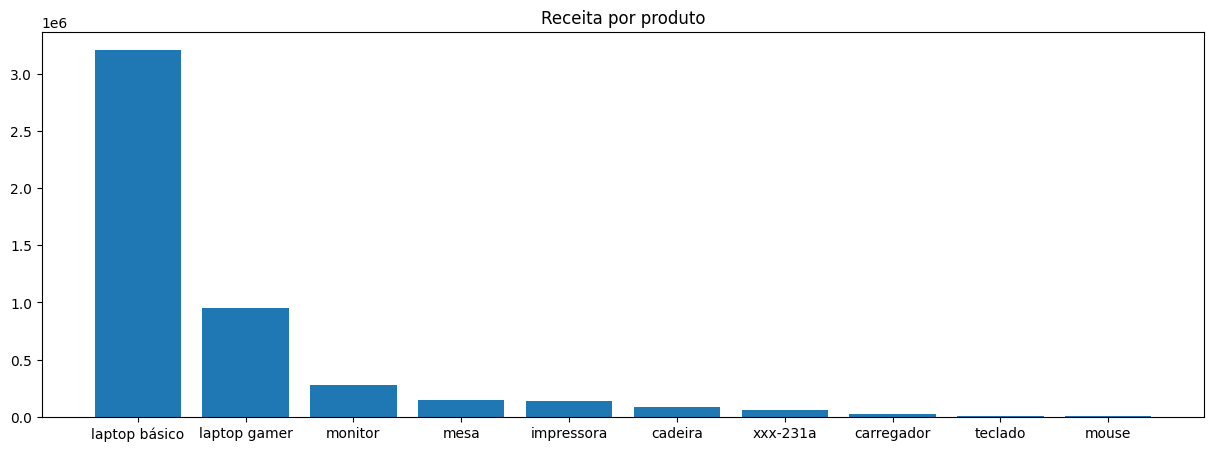

In [60]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por produto')

## Subplots

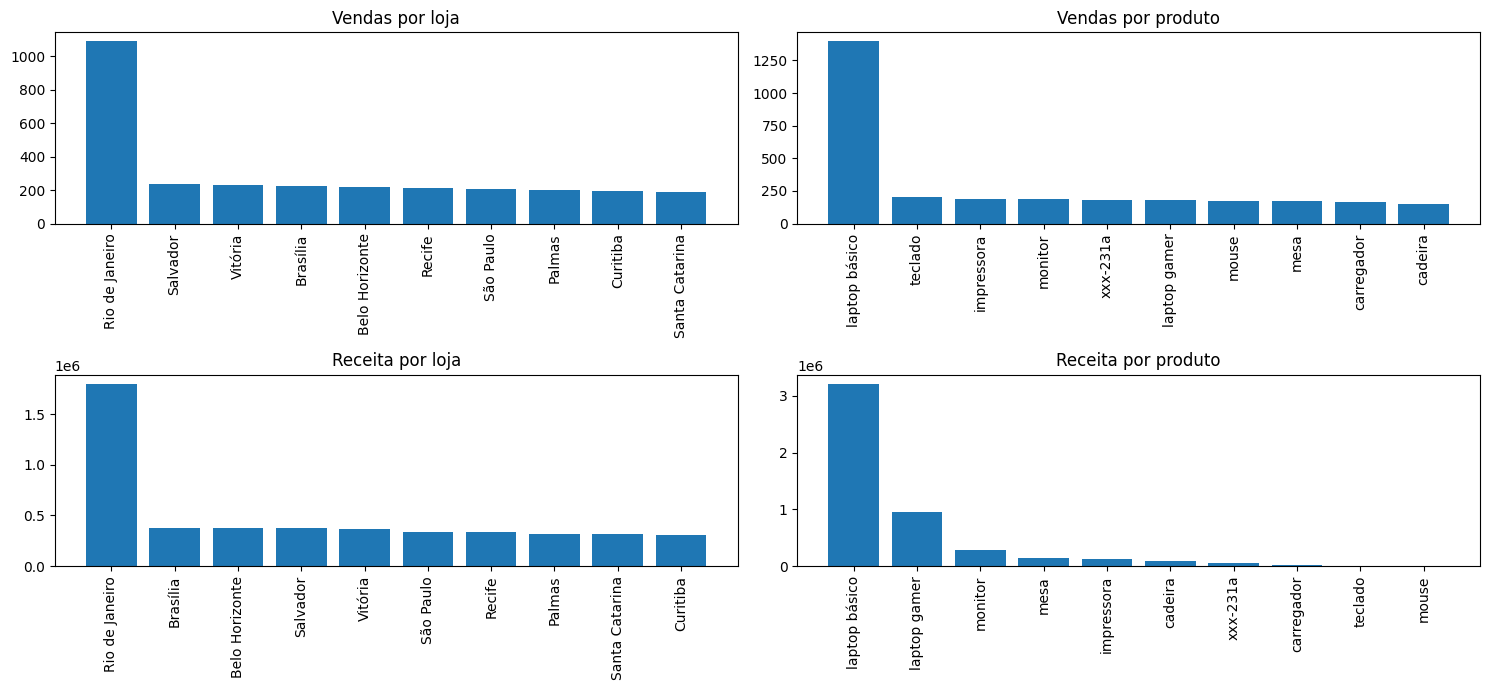

In [61]:
plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
graf_dados = df.groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por loja')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
graf_dados=df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Vendas por produto')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
graf_dados = df[['lojas_cidade','produto_valor']].groupby('lojas_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por loja')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index,graf_dados.values)
plt.title('Receita por produto')
plt.xticks(rotation=90)

plt.tight_layout()


## Receita por cliente

In [62]:
graf_dados = df[['cliente_nome','produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)

Text(0.5, 1.0, 'Receita por cliente')

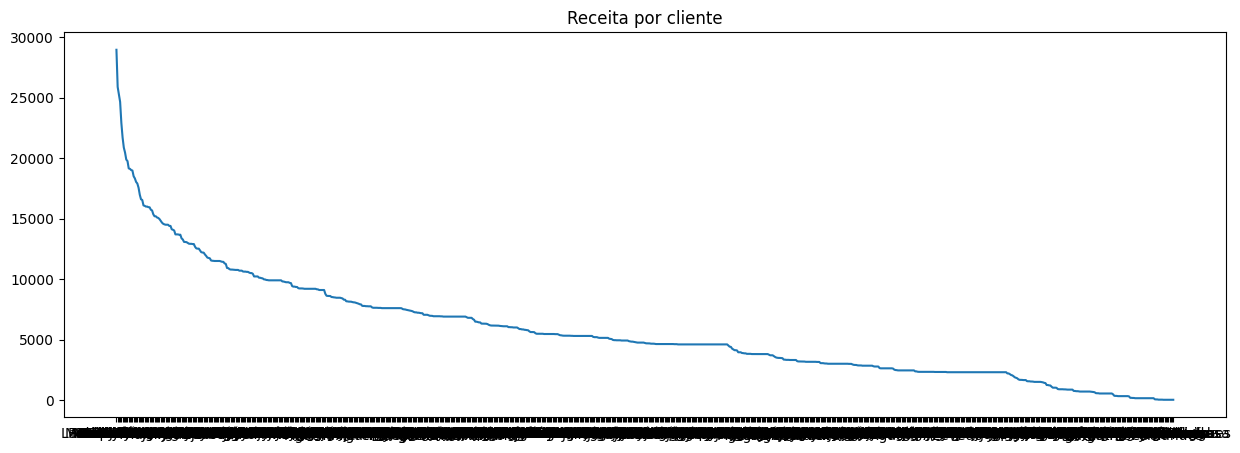

In [63]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index,graf_dados.values)
plt.title('Receita por cliente')

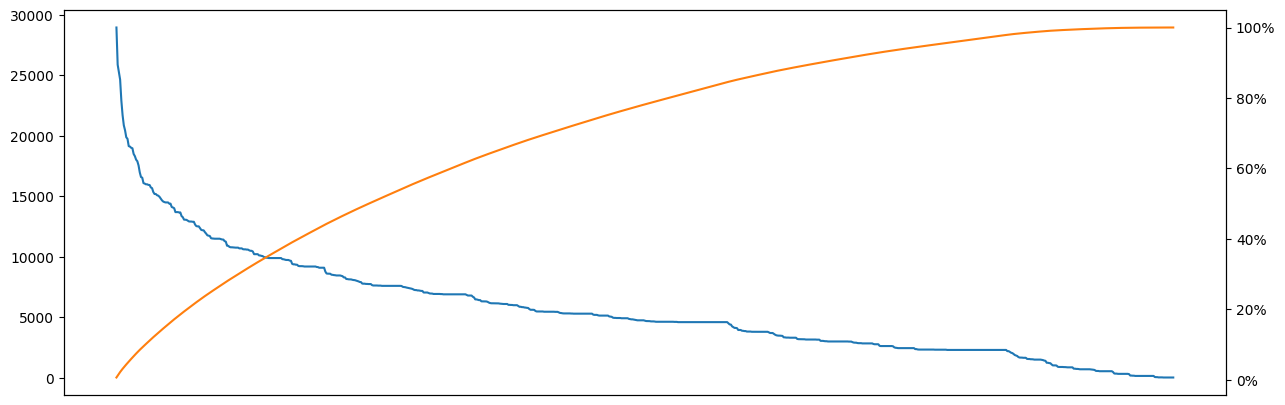

In [64]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados.index,graf_dados.values,color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index,graf_dados.values.cumsum()/graf_dados.values.sum()*100,color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

In [65]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count()

0.3170731707317073

## Pareto

Text(0.5, 1.0, 'Pareto de receita por produto')

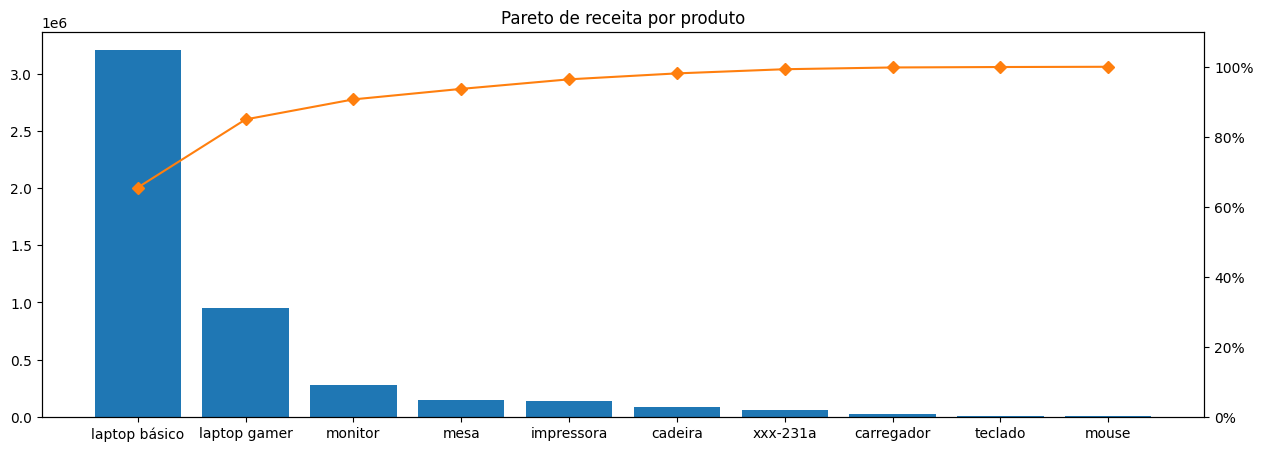

In [66]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index,graf_dados.values, color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index,graf_dados.values.cumsum()/graf_dados.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de receita por produto')

## Receita combinando produto-loja

In [67]:
graf_dados = pd.DataFrame(columns=('loja','produto','receita'))
graf_dados = []
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados.append({
            'loja': cidade,
            'produto': produto,
            'receita': df.produto_valor[(df.lojas_cidade==cidade) & (df.produto_produto==produto)].sum()           
        })
graf_dados = pd.DataFrame(graf_dados, columns=['loja','produto','receita'])

In [68]:
graf_dados

,loja,produto,receita
0,São Paulo,mouse,300.0000
1,São Paulo,teclado,510.0000
2,São Paulo,laptop básico,223100.0000
3,São Paulo,laptop gamer,63600.0000
4,São Paulo,monitor,30000.0000
...,...,...,...
95,Vitória,impressora,8400.0000
96,Vitória,carregador,2100.0000
97,Vitória,cadeira,5400.0000
98,Vitória,mesa,12040.0000


In [69]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='produto', ylabel='loja'>

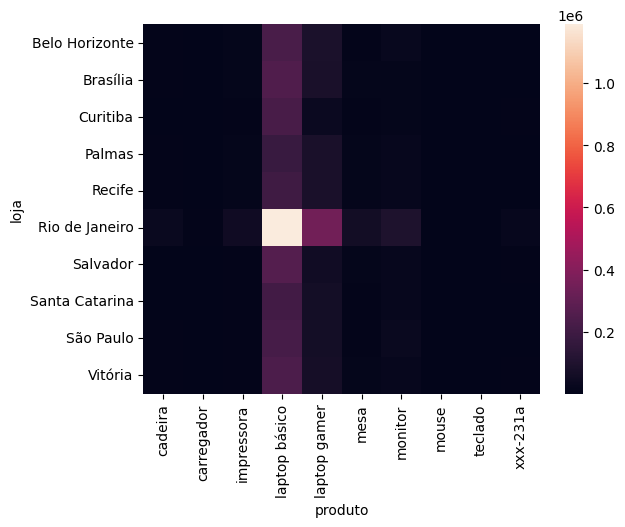

In [70]:
import seaborn as sns

graf_dados = graf_dados.pivot_table(index='loja',columns='produto',values='receita',aggfunc='sum')
sns.heatmap(graf_dados)

In [71]:
graf_dados = pd.DataFrame(columns=('loja','produto','receita'))
graf_dados = []
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados.append({
            'loja': cidade,
            'produto': produto,
            'receita': df.produto_valor[(df.lojas_cidade==cidade) & (df.produto_produto==produto)].sum()           
        })
graf_dados = pd.DataFrame(graf_dados, columns=['loja','produto','receita'])
graf_dados = graf_dados.sort_values(by='receita',ascending=False)
graf_dados

,loja,produto,receita
12,Rio de Janeiro,laptop básico,1189100.0
13,Rio de Janeiro,laptop gamer,344500.0
62,Salvador,laptop básico,264500.0
72,Brasília,laptop básico,250700.0
92,Vitória,laptop básico,241500.0
...,...,...,...
70,Brasília,mouse,220.0
60,Salvador,mouse,220.0
40,Santa Catarina,mouse,200.0
30,Belo Horizonte,mouse,200.0


In [72]:
graf_dados['lojaprod'] = graf_dados.loja + '-' + graf_dados.produto
graf_dados

,loja,produto,receita,lojaprod
12,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
13,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
62,Salvador,laptop básico,264500.0,Salvador-laptop básico
72,Brasília,laptop básico,250700.0,Brasília-laptop básico
92,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
70,Brasília,mouse,220.0,Brasília-mouse
60,Salvador,mouse,220.0,Salvador-mouse
40,Santa Catarina,mouse,200.0,Santa Catarina-mouse
30,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse


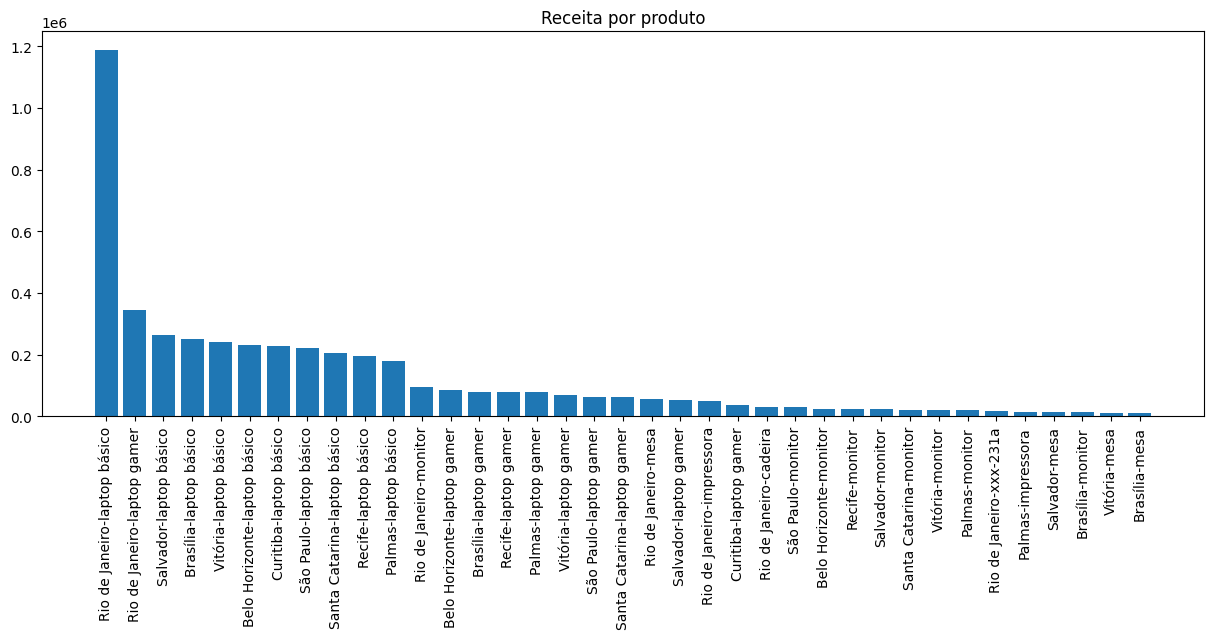

In [73]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.receita>0.01*graf_dados.receita.max()],graf_dados.receita[graf_dados.receita>0.01*graf_dados.receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por produto')
plt.show()

# Análise de tempo

## Tempo médio de pagamento

In [74]:
df.tempo_pg.mean()

22.47200772200772

Text(0.5, 1.0, 'Boxplot para tempo de pagamento')

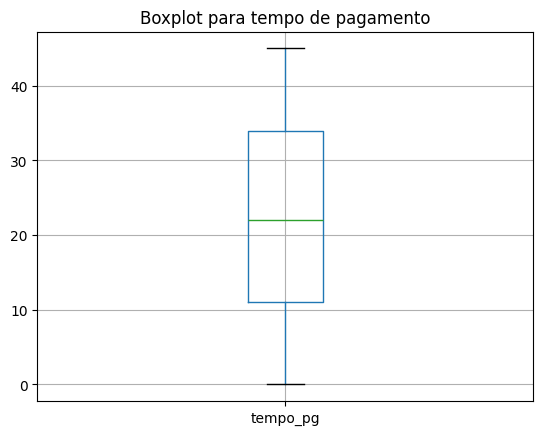

In [75]:
df.boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento')

C:\Users\astor\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\astor\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histograma para tempo de pagamento')

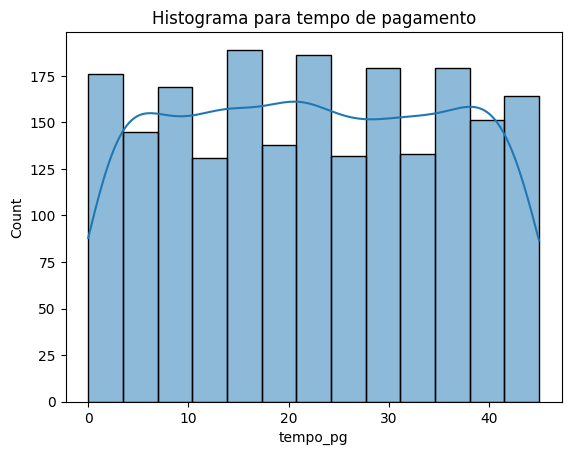

In [76]:
import seaborn as sns

sns.histplot(data=df.tempo_pg, kde=True)
plt.title('Histograma para tempo de pagamento')

In [77]:
df.tempo_pg.describe()
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,74.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,52.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,61.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,82.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,24.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,30.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,38.0


## Tempo de pagamento por cidade e produto

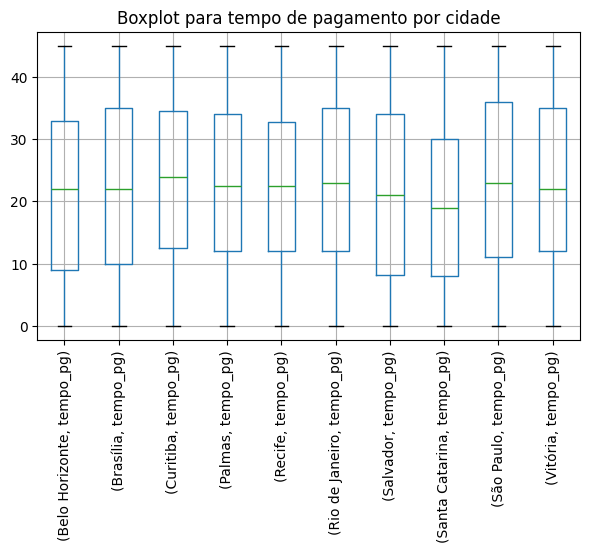

In [78]:
plt.figure(figsize=(7,4))
df[['lojas_cidade','tempo_pg']].groupby('lojas_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [79]:
df.groupby('produto_produto').tempo_pg.mean()

produto_produto
cadeira          23.734513
carregador       22.051724
impressora       21.383459
laptop básico    22.980513
laptop gamer     21.763889
mesa             20.300885
monitor          22.021277
mouse            22.912698
teclado          22.104575
xxx-231a         21.823077
Name: tempo_pg, dtype: float64

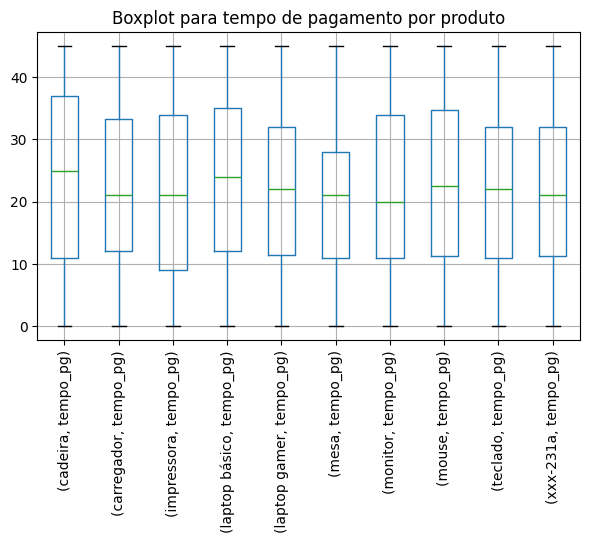

In [80]:
plt.figure(figsize=(7,4))
df[['produto_produto','tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por produto')
plt.xticks(rotation=90)
plt.show()

## Sazonalidade

In [81]:
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
graf_dados

,produto_valor
dt_venda,
2018-01-04,NaN
2018-01-05,NaN
2018-01-06,NaN
2018-01-07,NaN
2018-01-10,NaN
...,...
2020-09-20,7407.673893
2020-09-22,7635.302720
2020-09-24,7431.969387


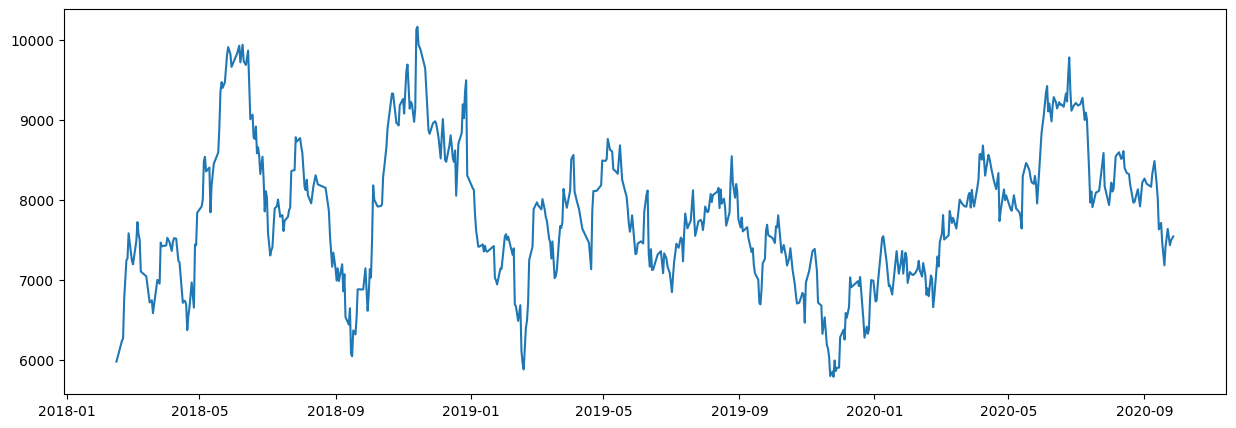

In [82]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index,graf_dados.values,color='C0')

# Análise de Inadimplência

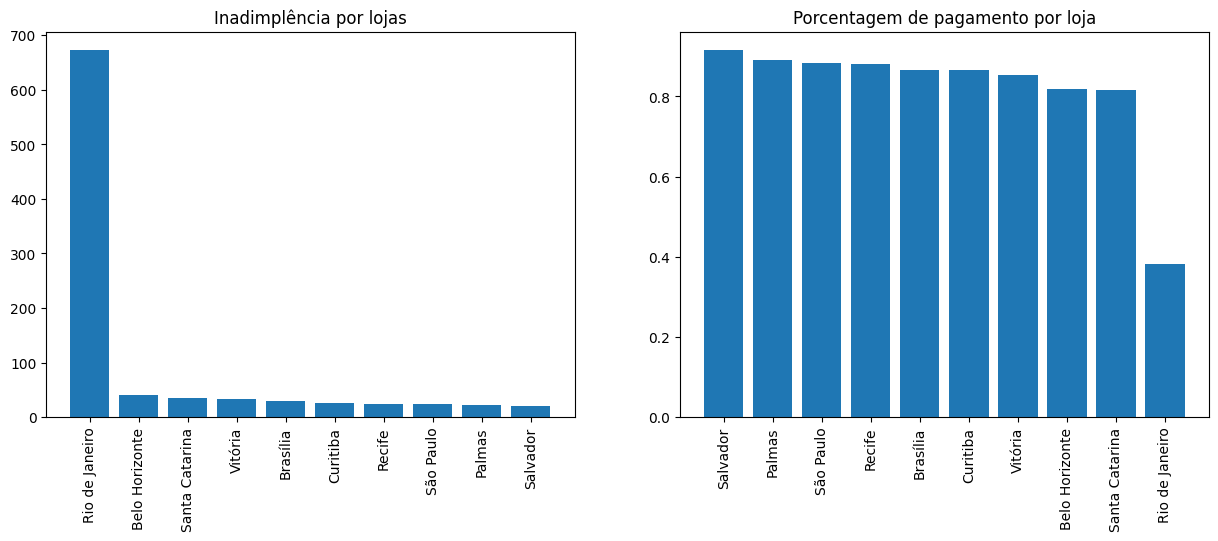

In [97]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados= df[df.pg==0].groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por lojas')

plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df.groupby('lojas_cidade').pg.mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por loja')

plt.xticks(rotation=90)

plt.show()

# Inadimplência por produto

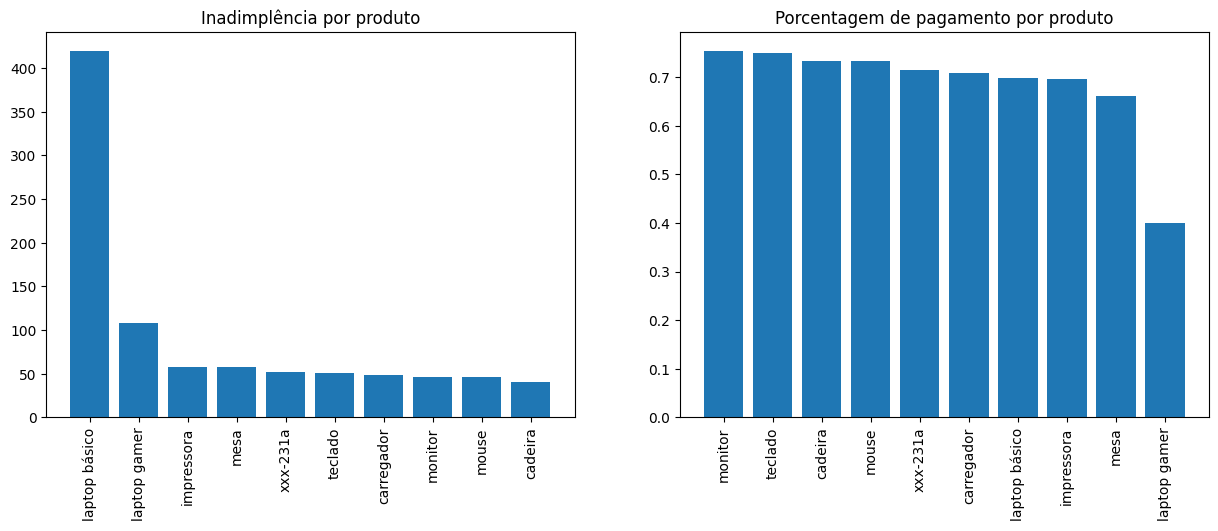

In [104]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Inadimplência por produto')

plt.subplot(1,2,2)
graf_dados = df.groupby('produto_produto').pg.mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por produto')
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='cliente_idade'>

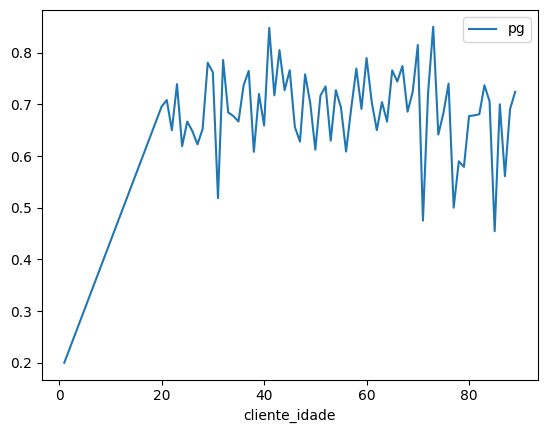

In [107]:
graf_dados = df[['cliente_idade','pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')
graf_dados.plot()

In [109]:
df[df.cliente_idade<2]

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
21,270,2,10,2018-01-12,Sem Nome,M,2023-01-01,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,1.0
1059,269,5,4,2018-12-15,Sem Nome,F,2023-01-01,Santa Catarina,laptop gamer,5300.0000,NaT,0,NaN,1.0
1745,269,9,3,2019-08-03,Sem Nome,F,2023-01-01,Palmas,laptop básico,2300.0000,2019-09-03,1,31.0,1.0
1900,269,2,3,2019-09-22,Sem Nome,F,2023-01-01,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,1.0
2370,277,10,3,2020-03-09,Brenda Santos,F,2023-01-01,Vitória,laptop básico,2300.0000,NaT,0,NaN,1.0


# Mapa de calor de inadimplência


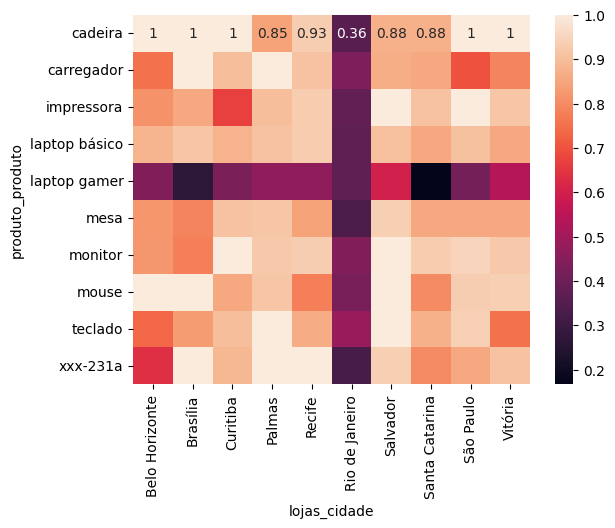

In [114]:
import seaborn as sns

graf_dados = df.pivot_table(index='produto_produto', columns='lojas_cidade', values='pg',aggfunc='mean')

sns.heatmap(graf_dados, annot=True)
plt.show()

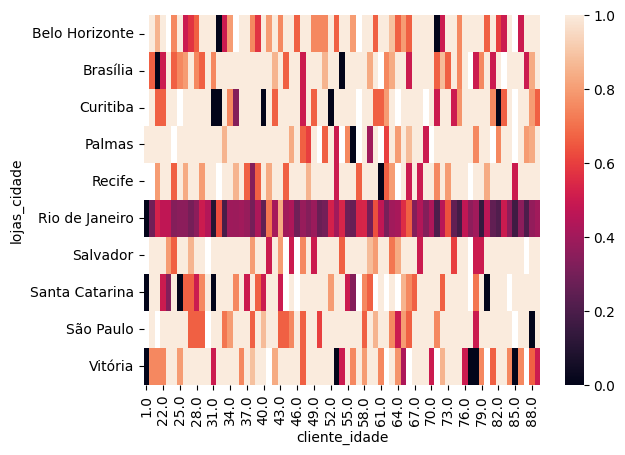

In [116]:
graf_dados = df.pivot_table(index='lojas_cidade', columns='cliente_idade', values='pg',aggfunc='mean')

sns.heatmap(graf_dados)
plt.show()

# Machine Learning

## Alvo

In [132]:
dfML = df[['cliente_sexo','lojas_cidade','produto_produto','produto_valor','cliente_idade','pg']]
dfML = dfML.replace([' ','-'],'_',regex=True)
dfML

,cliente_sexo,lojas_cidade,produto_produto,produto_valor,cliente_idade,pg
id,,,,,,
1,M,Palmas,laptop_básico,2300.0,74.0,1
2,F,Palmas,laptop_básico,2300.0,52.0,1
3,M,Salvador,cadeira,540.0,61.0,1
4,M,Belo_Horizonte,laptop_básico,2300.0,82.0,0
5,M,Palmas,mouse,20.0,83.0,1
...,...,...,...,...,...,...
2996,F,Curitiba,carregador,150.0,24.0,1
2997,F,Brasília,laptop_básico,2300.0,30.0,1
2998,M,Rio_de_Janeiro,laptop_gamer,5300.0,38.0,0


## Normalização

In [133]:
dfML['produto_valor'] = dfML['produto_valor']/dfML['produto_valor'].max()
dfML['cliente_idade'] = dfML['cliente_idade']/dfML['cliente_idade'].max()
dfML

,cliente_sexo,lojas_cidade,produto_produto,produto_valor,cliente_idade,pg
id,,,,,,
1,M,Palmas,laptop_básico,0.433962,0.831461,1
2,F,Palmas,laptop_básico,0.433962,0.584270,1
3,M,Salvador,cadeira,0.101887,0.685393,1
4,M,Belo_Horizonte,laptop_básico,0.433962,0.921348,0
5,M,Palmas,mouse,0.003774,0.932584,1
...,...,...,...,...,...,...
2996,F,Curitiba,carregador,0.028302,0.269663,1
2997,F,Brasília,laptop_básico,0.433962,0.337079,1
2998,M,Rio_de_Janeiro,laptop_gamer,1.000000,0.426966,0


## Dados categóricos

In [136]:
col_cat = ['cliente_sexo','lojas_cidade','produto_produto']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str),drop_first=False, dtype=int)
dfML_dummies

,cliente_sexo_0,cliente_sexo_F,cliente_sexo_M,lojas_cidade_Belo_Horizonte,lojas_cidade_Brasília,lojas_cidade_Curitiba,lojas_cidade_Palmas,lojas_cidade_Recife,lojas_cidade_Rio_de_Janeiro,lojas_cidade_Salvador,...,produto_produto_cadeira,produto_produto_carregador,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2997,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2998,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [137]:
dfML = pd.concat([dfML, dfML_dummies],axis=1)
dfML = dfML.drop(col_cat,axis=1)
dfML

,produto_valor,cliente_idade,pg,cliente_sexo_0,cliente_sexo_F,cliente_sexo_M,lojas_cidade_Belo_Horizonte,lojas_cidade_Brasília,lojas_cidade_Curitiba,lojas_cidade_Palmas,...,produto_produto_cadeira,produto_produto_carregador,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a
id,,,,,,,,,,,,,,,,,,,,,
1,0.433962,0.831461,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.433962,0.584270,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0.101887,0.685393,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.433962,0.921348,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0.003774,0.932584,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.028302,0.269663,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2997,0.433962,0.337079,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2998,1.000000,0.426966,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Dados de treinamento e teste

In [127]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

In [140]:
y=dfML.pg
x=dfML.drop(['pg'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_new = x.loc[[2997,2998]]
x_new

,produto_valor,cliente_idade,cliente_sexo_0,cliente_sexo_F,cliente_sexo_M,lojas_cidade_Belo_Horizonte,lojas_cidade_Brasília,lojas_cidade_Curitiba,lojas_cidade_Palmas,lojas_cidade_Recife,...,produto_produto_cadeira,produto_produto_carregador,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a
id,,,,,,,,,,,,,,,,,,,,,
2997,0.433962,0.337079,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2998,1.000000,0.426966,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Regressão Logística

In [141]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 3.3 MB/s eta 0:00:03
     - -------------------------------------- 0.2/9.2 MB 3.6 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/9.2 MB 5.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.4/9.2 MB 7.2 MB/s eta 0:00:02
     ---------- ----------------------------- 2.5/9.2 MB 10.5 MB/s eta 0:00:01
     -------------- ------------------------- 3.4/9.2 MB 12.0 MB/s eta 0:00:01
     ------------------ --------------------- 4.2/9.2 MB 12.9 MB/s eta 0:00:01
     ------------------ --------------------- 4.2/9.2 MB 12.9 MB/s eta 0:00:01
     -------------------------- ------------- 6.2/9.2 MB 14.6 MB/s eta 0:00:01
     ------------------------------ --------- 7.0/9.2 MB 14.8 MB/s eta 0:00:01


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [142]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfML.drop(['pg'],axis=1).columns)
modelo = smf.glm(formula='pg ~ ' + all_col_with_plus, data=dfML, family=sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2978
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1414.7
Date:                Wed, 22 Nov 2023   Deviance:                       2829.4
Time:                        10:57:07   Pearson chi2:                 3.02e+03
No. Iterations:                    25   Pseudo R-squ. (CS):             0.2547
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [144]:
model = LogisticRegression(penalty='none',solver='newton-cg')
model.fit(x_train,y_train)

print('Matriz de confusão')
print(confusion_matrix(y_test, model.predict(x_test)))
print('\n Report completo')
print(classification_report(y, model.predict(x)))
print('\n Report teste')
print(classification_report(y_test, model.predict(x_test)))

Matriz de confusão
[[212  83]
 [121 484]]

 Report completo
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       928
           1       0.87      0.81      0.83      2072

    accuracy                           0.78      3000
   macro avg       0.74      0.76      0.75      3000
weighted avg       0.79      0.78      0.78      3000


 Report teste
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       295
           1       0.85      0.80      0.83       605

    accuracy                           0.77       900
   macro avg       0.75      0.76      0.75       900
weighted avg       0.78      0.77      0.78       900



C:\Users\astor\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [145]:
model.predict(x_new)

array([1, 0], dtype=int64)

## Árvore de Decisão

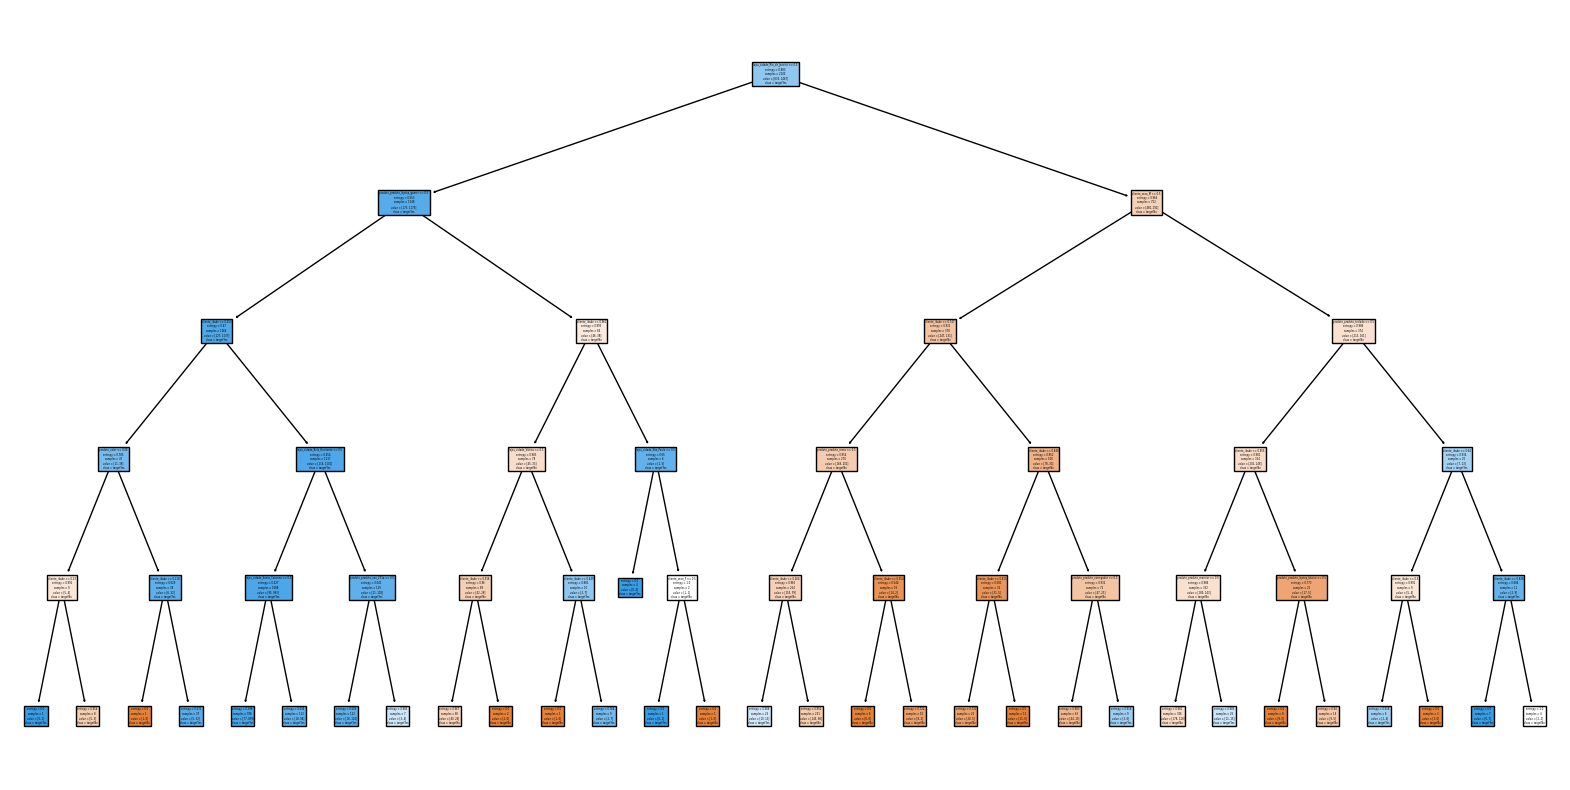

In [146]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(x_train, y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model,
                   feature_names=x.columns,
                   class_names=['targetNo','targetYes'],
                   filled=True)

In [147]:
print('Matriz de confusão')
print(confusion_matrix(y_test, model.predict(x_test)))
print('\n Report completo')
print(classification_report(y, model.predict(x)))
print('\n Report teste')
print(classification_report(y_test, model.predict(x_test)))

Matriz de confusão
[[215  80]
 [128 477]]

 Report completo
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       928
           1       0.88      0.81      0.84      2072

    accuracy                           0.79      3000
   macro avg       0.76      0.78      0.76      3000
weighted avg       0.80      0.79      0.79      3000


 Report teste
              precision    recall  f1-score   support

           0       0.63      0.73      0.67       295
           1       0.86      0.79      0.82       605

    accuracy                           0.77       900
   macro avg       0.74      0.76      0.75       900
weighted avg       0.78      0.77      0.77       900



In [148]:
model.predict(x_new)

array([1, 0], dtype=int64)

## Redes Neurais

In [149]:
pip install keras

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.7 MB 1.7 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 2.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.4/1.7 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.8 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
from keras import Sequential
from keras.layers import Dense
import keras
import tensorflow
tensorflow.random.set_seed(2)

model = Sequential()
model.add(Dense(15, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(7, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


In [153]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128, epochs=300,verbose=False)

In [155]:
print('Matriz de confusão')
print(confusion_matrix(y_test, model.predict_classes(x_test)))
print('\n Report completo')
print(classification_report(y, model.predict_classes(x)))
print('\n Report teste')
print(classification_report(y_test, model.predict_classes(x_test)))

Matriz de confusão


AttributeError: 'Sequential' object has no attribute 'predict_classes'